In [2]:
import os

# Список необходимых библиотек
required_libraries = [
    "tensorflow",       # Для обучения моделей
    "keras",            # Основной фреймворк для нейронных сетей
    "numpy",            # Для работы с массивами
    "scikit-learn",     # Для разделения данных и других вспомогательных функций
    "opencv-python",    # Для обработки изображений
    "matplotlib"        # Для визуализации данных
]

# Установка библиотек через pip
for lib in required_libraries:
    os.system(f"pip install {lib}")


In [9]:
from keras import models, layers, optimizers, callbacks
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import os, cv2
from matplotlib import pyplot as plt

# Проверка существования папки
def check_directory(base_dir):
    if not os.path.exists(base_dir):
        print(f"Путь '{base_dir}' не найден. Проверьте правильность пути.")
        return False
    else:
        print(f"Содержимое каталога: {os.listdir(base_dir)}")
        return True

# Функция для загрузки данных
def load_data(base_dir, folders):
    imgs, labels = [], []
    for folder in folders:  # каждая папка с буквами
        folder_path = base_dir + f"/{folder}"
        if not os.path.exists(folder_path):  # Проверка наличия папки
            print(f"Папка '{folder}' отсутствует в '{base_dir}'.")
            continue
        for img in os.listdir(folder_path):  # каждое изображение
            if img.endswith('.png'):  # только .png файлы
                try:
                    image = cv2.imread(folder_path + f"/{img}")[:, :, 0]
                    # Проверка, что изображение корректное
                    if not np.all(image == image[0]):
                        imgs.append(image)
                        labels.append(folder)  # добавляем метку класса
                except:
                    print(f"Ошибка при чтении {folder_path}/{img}")
                    continue
    return np.array(imgs).astype('float32') / 255.0, labels

# Преобразование меток в категориальные значения
def convert_to_categorical(labels, categories='ABCDEFGHIJ'):
    new_labels = np.zeros((len(labels), len(categories)))
    for i, label in enumerate(labels):
        new_labels[i][categories.find(label)] = 1
    return new_labels

# Основной путь к данным
base_dir = r"C:\Users\1neon\Desktop\DZ\notMNIST_small"  # Указан путь для вашего случая
folders = 'ABCDEFGHIJ'

# Проверка директории
if check_directory(base_dir):
    # Загрузка данных
    imgs, labels = load_data(base_dir, folders)
    labels = convert_to_categorical(labels)

    # Перемешивание данных
    indices = np.arange(labels.shape[0])
    np.random.shuffle(indices)
    imgs = imgs[indices]
    labels = labels[indices]

    # Разделение на тренировочную и тестовую выборку
    X_train, X_test, y_train, y_test = train_test_split(
        imgs.reshape(-1, 28, 28, 1), labels, test_size=0.2, random_state=42
    )

    # Создание модели
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')  # 10 классов
    ])

    model.compile(
        optimizer=optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Коллбэки
    checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
    early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    # Обучение модели
    history = model.fit(
        X_train, y_train,
        epochs=20, batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint_cb, early_stopping_cb]
    )

    # Оценка модели
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Точность на тесте: {test_acc:.2f}")


Содержимое каталога: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Ошибка при чтении C:\Users\1neon\Desktop\DZ\notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
Ошибка при чтении C:\Users\1neon\Desktop\DZ\notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png
Epoch 1/20


c:\Users\1neon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/369 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8022 - loss: 0.6558

369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8029 - loss: 0.6538 - val_accuracy: 0.6137 - val_loss: 1.1403
Epoch 2/20
365/369 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9235 - loss: 0.2529

369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9235 - loss: 0.2528 - val_accuracy: 0.9210 - val_loss: 0.2728
Epoch 3/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9460 - loss: 0.1770 - val_accuracy: 0.9156 - val_loss: 0.2793
Epoch 4/20
363/369 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9612 - loss: 0.1337

369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9611 - loss: 0.1339 - val_accuracy: 0.9278 - val_loss: 0.2679
Epoch 5/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9665 - loss: 0.1042 - val_accuracy: 0.9224 - val_loss: 0.2694
Epoch 6/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9817 - loss: 0.0665 - val_accuracy: 0.9207 - val_loss: 0.3028
Epoch 7/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9804 - loss: 0.0683 - val_accuracy: 0.9200 - val_loss: 0.3105
Epoch 8/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9841 - loss: 0.0561 - val_accuracy: 0.9271 - val_loss: 0.3022
Epoch 9/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9864 - loss: 0.0469 - val_accuracy: 0.9268 - val_loss: 0.3016
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.2836
Точность на тесте: 0.92


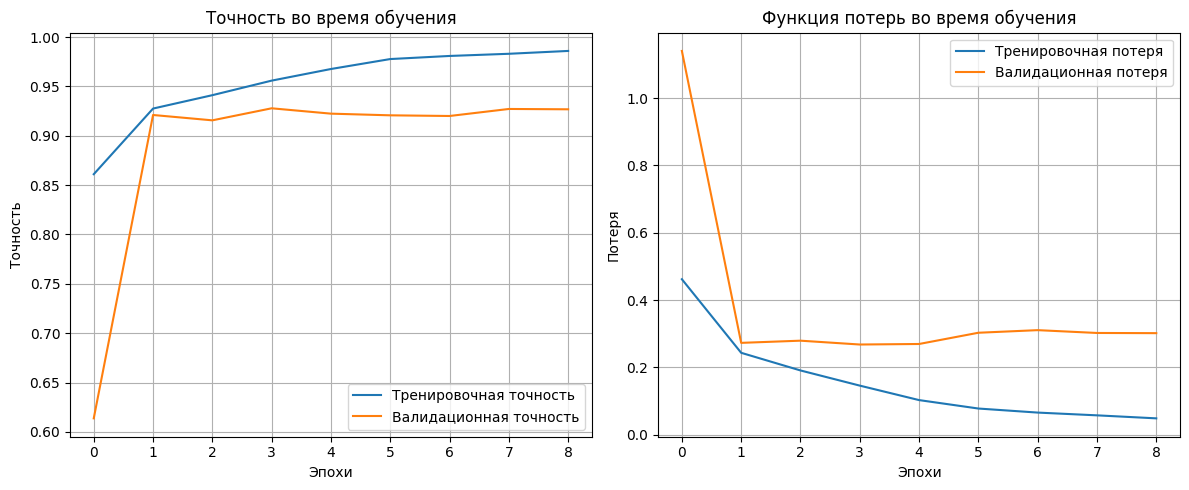

In [10]:
import matplotlib.pyplot as plt

# Визуализация результатов обучения
def plot_metrics(history):
    # Точность
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Тренировочная точность')
    plt.plot(history.history['val_accuracy'], label='Валидационная точность')
    plt.title('Точность во время обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    
    # Функция потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Тренировочная потеря')
    plt.plot(history.history['val_loss'], label='Валидационная потеря')
    plt.title('Функция потерь во время обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Потеря')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Вызов функции для построения графиков
plot_metrics(history)


Выводы по графикам:
График точности (Accuracy during training):

Видно, что точность модели на тренировочных данных быстро растёт в первые эпохи и достигает стабильного уровня.

Валидационная точность также показывает высокие результаты, достигая уровня около 92%. Это говорит о том, что модель хорошо обобщает данные и избегает переобучения.

График потерь (Loss function during training):

Потери на тренировочных данных постепенно снижаются, что свидетельствует о том, что модель успешно минимизирует ошибки.

Потери на валидационных данных стабилизируются, что подтверждает хорошую способность модели к предсказанию.